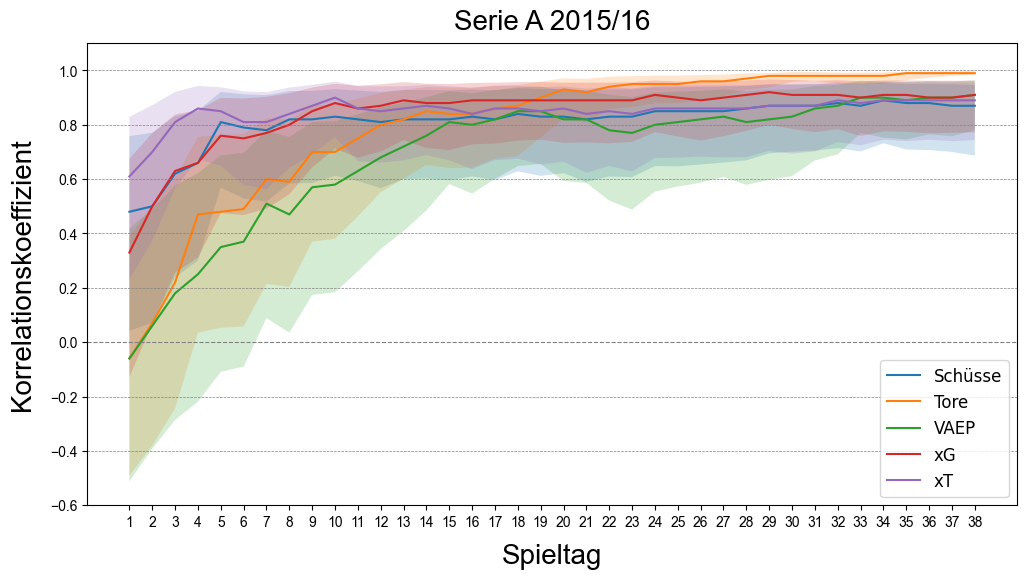

Diagramm wurde erfolgreich gespeichert unter: /Users/andreas/Desktop/Serie_A.png


In [50]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Import file
desktop_path = os.path.expanduser("~/Documents/Ausbildung/Studium/DSHS - SGP/Module/Bachelorarbeit/Ergebnisse/Korrelationen/Serie A")
diagram_path = os.path.join(desktop_path, "Pearson_Punktekorrelation_Serie_A_gesamt.xlsx")
df = pd.read_excel(diagram_path)

# Rename columns
df.rename(columns={
    "Spieltag": "Spieltag",
    "shots Pearson Punktekorrelation": "Schüsse",
    "goals_poisson Pearson Punktekorrelation": "Tore",
    "vaep Pearson Punktekorrelation": "VAEP",
    "xG Pearson Punktekorrelation": "xG",
    "xT Pearson Punktekorrelation": "xT",
    "xG Konfidenzintervall upper Pearson": "xG_upper",
    "xG Konfidenzintervall lower Pearson": "xG_lower",
    "xT Konfidenzintervall upper Pearson": "xT_upper",
    "xT Konfidenzintervall lower Pearson": "xT_lower",
    "vaep Konfidenzintervall upper Pearson": "VAEP_upper",
    "vaep Konfidenzintervall lower Pearson": "VAEP_lower",
    "shots Konfidenzintervall upper Pearson": "Schüsse_upper",
    "shots Konfidenzintervall lower Pearson": "Schüsse_lower",
    "goals_poisson Konfidenzintervall upper Pearson": "Tore_upper_poisson",
    "goals_poisson Konfidenzintervall lower Pearson": "Tore_lower_poisson",
}, inplace=True)

# Change columns in numeric values
for col in df.columns[1:]:  # First is "Spieltag", iterate after second one
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Gameday as x-axis
spieltag = df["Spieltag"]

# Define metrics & CI
metrics = ["Schüsse", "Tore","VAEP", "xG", "xT"]
conf_intervals = {
    "xG": ("xG_upper", "xG_lower"),
    "xT": ("xT_upper", "xT_lower"),
    "VAEP": ("VAEP_upper", "VAEP_lower"),
    "Schüsse": ("Schüsse_upper", "Schüsse_lower"),
    "Tore": ("Tore_upper_poisson", "Tore_lower_poisson"),
}

# Create diagram
plt.figure(figsize=(12, 6))
for metric in metrics:
    upper_col, lower_col = conf_intervals[metric]
    plt.plot(spieltag, df[metric], marker='', label=metric)  # Main line
    plt.fill_between(spieltag, df[lower_col], df[upper_col], alpha=0.2)  # CI

plt.xlabel("Spieltag", fontsize=20, labelpad=10, fontname='Arial')
plt.ylabel("Korrelationskoeffizient", fontsize=20, labelpad=10, fontname='Arial')
plt.title("Serie A 2015/16", fontsize=20, pad=10, fontname='Arial')

# Set horizontal lines
plt.axhline(y=1, color='gray', linestyle='--', linewidth=0.5)
plt.axhline(y=0.8, color='gray', linestyle='--', linewidth=0.5)
plt.axhline(y=0.6, color='gray', linestyle='--', linewidth=0.5)
plt.axhline(y=0.4, color='gray', linestyle='--', linewidth=0.5)
plt.axhline(y=0.2, color='gray', linestyle='--', linewidth=0.5)
plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.8)
plt.axhline(y=-0.2, color='gray', linestyle='--', linewidth=0.5)
plt.axhline(y=-0.4, color='gray', linestyle='--', linewidth=0.5)

plt.xticks(spieltag, rotation=0, color='black', fontname='Arial')
plt.yticks(color='black', fontname='Arial')

# Set boundaries
plt.ylim(-0.6, 1.1)

# Set legend
plt.legend(loc='lower right',fontsize=12)
plt.grid(False)

# Save diagram
desktop_path_export = os.path.join(os.path.expanduser("~"), "Desktop", "Serie_A.png")
plt.savefig(desktop_path_export, dpi=300, bbox_inches="tight")

plt.show()

print(f"Diagramm wurde erfolgreich gespeichert unter: {desktop_path_export}")

